draft:

In [1]:
x = '7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6'
x = x.split(';')
x = [float(i) for i in x]
print(x)

[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8, 6.0]


### imports:

In [46]:
import csv
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import random
import math

# The Data:

In [56]:
data_list = []
with open("winequality-white.csv") as csvfile:
    first_line = True
    reader = csv.reader(csvfile)
    for row in reader:
        if first_line:
            vars = row[0].replace('"','').split(";")
            first_line = False
            continue
        current_row = row[0].split(';')
        current_row = [float(num) for num in current_row]
        data_list.append(current_row)
        
print(vars)
print(data_list[0:5])

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
[[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8, 6.0], [6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5, 6.0], [8.1, 0.28, 0.4, 6.9, 0.05, 30.0, 97.0, 0.9951, 3.26, 0.44, 10.1, 6.0], [7.2, 0.23, 0.32, 8.5, 0.058, 47.0, 186.0, 0.9956, 3.19, 0.4, 9.9, 6.0], [7.2, 0.23, 0.32, 8.5, 0.058, 47.0, 186.0, 0.9956, 3.19, 0.4, 9.9, 6.0]]


In [4]:
df = pd.DataFrame(data_list)
df.columns = vars

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   float64
dtypes: float64(12)
memory usage: 459.3 KB


In [6]:
print(*df.columns, sep='\n')

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


# variables histograms before normalization:

##### The blue line is kernel density estimator.
##### The black line (norm) is maximum likelihood gaussian distribution fit.

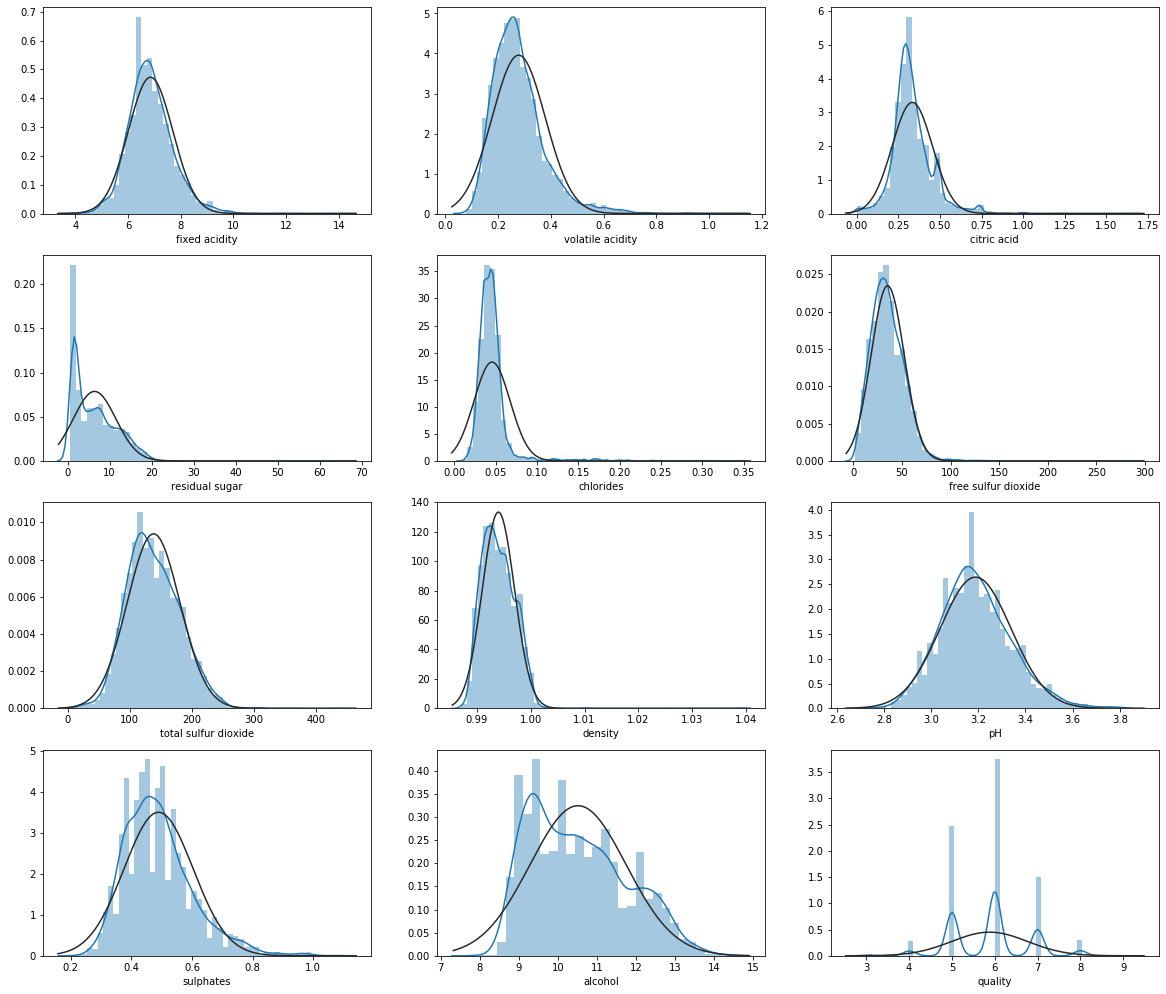

In [8]:
plt.figure(figsize = (20,22))

for i in range(1,13):
    plt.subplot(5,3,i)
    sns.distplot(df[df.columns[i-1]], fit=norm)
# fit=norm
# hist=False

# variables normalization:

In [9]:
data_array = df.values
min_max_scaler = preprocessing.MinMaxScaler()
normalized_data_array = min_max_scaler.fit_transform(data_array)
normalized_data = normalized_data_array.tolist()
df_normalized = pd.DataFrame(normalized_data_array)
df_normalized.columns = vars

In [10]:
df_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,0.5
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,0.5
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,0.5
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,0.5


# variables histograms after normalization:

##### The blue line is kernel density estimator.
##### The black line (norm) is maximum likelihood gaussian distribution fit.

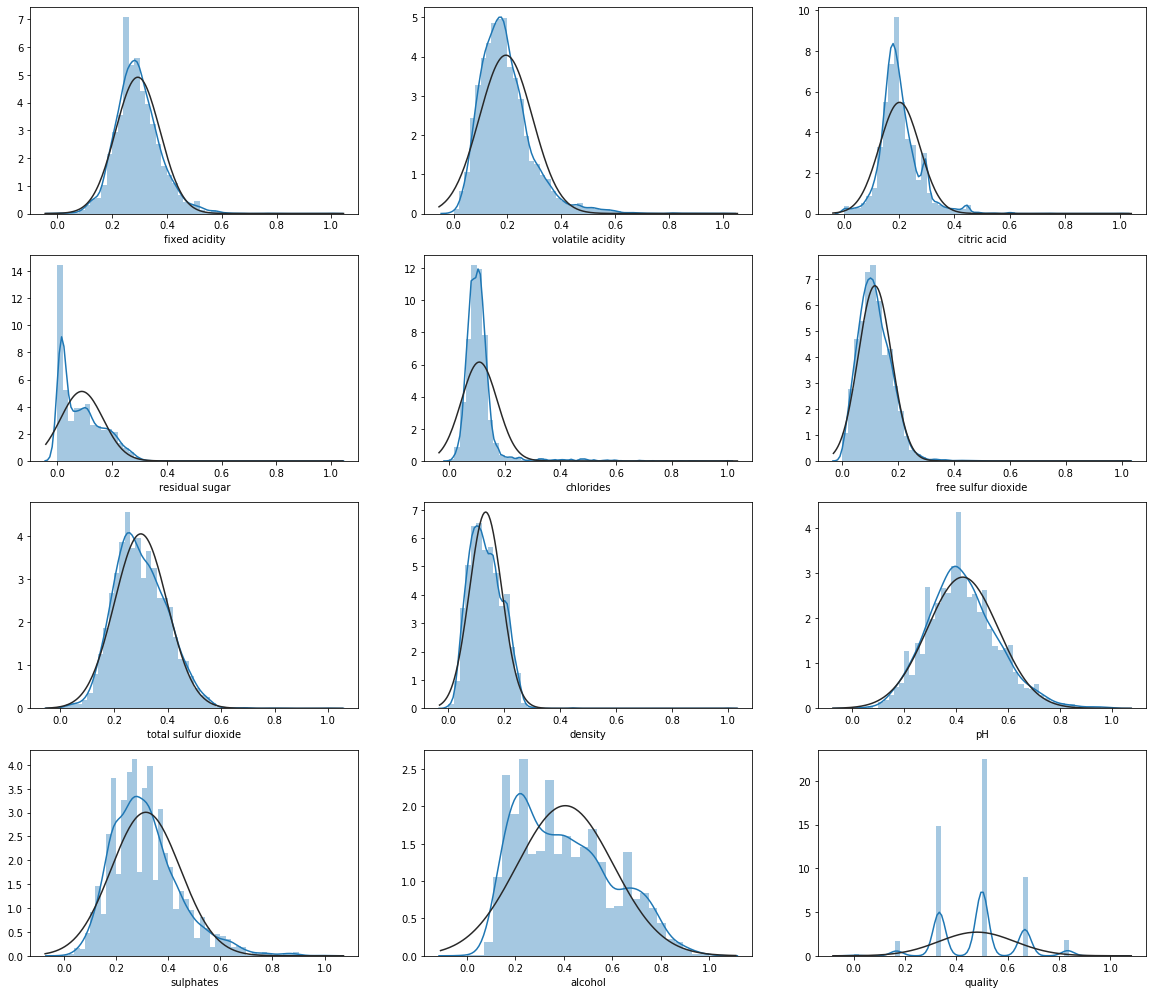

In [11]:
plt.figure(figsize = (20,22))

for i in range(1,13):
    plt.subplot(5,3,i)
    sns.distplot(df_normalized[df_normalized.columns[i-1]], fit=norm)
# fit=norm
# hist=False

# data without the quality column:

In [12]:
df_without_quality = df.drop(["quality"], axis=1)
df_without_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


# normalized data without the quality column:

In [13]:
df_normalized_without_quality = df_normalized.drop(["quality"], axis=1)
df_normalized_without_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452


# Cutting the normalized data into parts randomly:

## (training and test)

In [51]:
shuffled_normalized_data = normalized_data
random.shuffle(shuffled_normalized_data)
training_set = shuffled_normalized_data[: int(len(normalized_data) * 0.8)] # 80% training set
test_set = shuffled_normalized_data[int(len(normalized_data) * 0.8) :] # 20% test set
# print("data length:",len(data_list))
# print("normalized data length:",len(normalized_data))
# print("shuffle normalized data length:",len(shuffled_normalized_data))
# print("training set length:",len(training_set))
# print("test set length:",len(test_set))

# Example of DBScan clustering:

In [15]:
db_examp = np.array([[1, 2],[40,50],[2, 3],[10,11],[12,13],[14,15],
              [8, 7],[2,2],[8, 8],[25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(db_examp)
print(clustering.core_sample_indices_)
print(clustering.components_)
print(clustering.labels_)

[0 2 3 4 5 6 7 8]
[[ 1  2]
 [ 2  3]
 [10 11]
 [12 13]
 [14 15]
 [ 8  7]
 [ 2  2]
 [ 8  8]]
[ 0 -1  0  1  1  1  2  0  2 -1]


# DBScan on the data:

In [55]:
clustering = DBSCAN(eps=math.sqrt(25), min_samples=4).fit(data_list)
clustering_labels = clustering.labels_
hist_dictionary = {}
for i in clustering_labels:
    if str(i) in hist_dictionary:
        hist_dictionary[str(i)] = hist_dictionary[str(i)] + 1
    else:
        hist_dictionary[str(i)] = 1
clusters_names_numeric = [int(x) for x in hist_dictionary.keys()]
clusters_names_numeric.sort()
clusters_names = [str(name) for name in clusters_names_numeric]
points_amount_for_cluster = [hist_dictionary[x] for x in clusters_names]

clustering_hist_df = pd.DataFrame([points_amount_for_cluster])
clustering_hist_df.columns = clusters_names
print('Table of the component number, and how many points each one of them has:')
clustering_hist_df


Table of the component number, and how many points each one of them has:


,-1,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,278,4460,10,6,11,12,7,4,6,5,...,4,4,8,5,8,17,4,3,5,3


# Example of Kmeans clustering:

In [47]:
kmeans_examp = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(kmeans_examp)
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

# Kmeans on the data:

In [50]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(data_list)
kmeans_labels = kmeans.labels_
hist_dictionary = {}
for i in kmeans_labels:
    if str(i) in hist_dictionary:
        hist_dictionary[str(i)] = hist_dictionary[str(i)] + 1
    else:
        hist_dictionary[str(i)] = 1
clusters_names_numeric = [int(x) for x in hist_dictionary.keys()]
clusters_names_numeric.sort()
clusters_names = [str(name) for name in clusters_names_numeric]
points_amount_for_cluster = [hist_dictionary[x] for x in clusters_names]

clustering_hist_df = pd.DataFrame([points_amount_for_cluster])
clustering_hist_df.columns = clusters_names
print('Table of the component number, and how many points each one of them has:')
clustering_hist_df

Table of the component number, and how many points each one of them has:


,0,1,2,3,4,5,6,7,8,9
0,724,537,353,642,841,7,270,632,447,445
